<a href="https://colab.research.google.com/github/touhid0503/Heart_Disease_Diagnosis_Support_System/blob/main/HDDSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# 🛠 Revised Methodology

## Heart Disease Diagnosis Support System Using Machine Learning

---

## Step 1: Problem Identification & Objective Definition

Heart disease remains one of the leading causes of death worldwide. Early identification of patients at risk can significantly reduce mortality through timely medical intervention.

**Objective:**
To develop a **machine learning–based heart disease diagnosis support system** that predicts whether a patient has heart disease using clinical and physiological attributes.

**System Output:**

* Binary classification:

  * **1 → Heart Disease Present**
  * **0 → No Heart Disease**
* Probability score indicating disease risk

> This system is designed to assist medical professionals and does not replace clinical diagnosis.

---

## Step 2: Dataset Description & Understanding

The dataset used in this project is collected from **Kaggle**, originally derived from the **UCI Heart Disease dataset**.

### Dataset Overview:

* **Total records:** 303 patients
* **Total features:** 13 input features + 1 target variable
* **Target variable:** `target`

  * 1 = Heart disease present
  * 0 = No heart disease

### Feature Description:

| Category             | Features                                                               |
| -------------------- | ---------------------------------------------------------------------- |
| Demographic          | Age, Sex                                                               |
| Clinical             | Resting Blood Pressure, Cholesterol, Fasting Blood Sugar               |
| ECG & Heart Function | Resting ECG, Maximum Heart Rate (thalach)                              |
| Exercise Related     | Exercise Induced Angina, ST Depression (oldpeak), Slope                |
| Medical Indicators   | Chest Pain Type (cp), Number of Major Vessels (ca), Thalassemia (thal) |

Most features are **numerical or ordinal**, already encoded, making the dataset suitable for machine learning models.

---

## Step 3: Data Preprocessing

Since healthcare data must be handled carefully, the following preprocessing steps are applied:

### 3.1 Missing Value Analysis

* The dataset contains **no missing values**
* Data integrity is verified before modeling

### 3.2 Feature Encoding

* Categorical variables (e.g., `sex`, `cp`, `thal`, `slope`) are **already numerically encoded**
* No additional encoding is required

### 3.3 Feature Scaling

* Numerical features are scaled using **Standardization (StandardScaler)**
* This ensures equal contribution of features, especially for distance-based models like SVM

### 3.4 Train–Test Split

* Dataset split into:

  * **80% training data**
  * **20% testing data**
* Stratified sampling is used to preserve class balance

---

## Step 4: Exploratory Data Analysis (EDA)

EDA is conducted to understand data distribution and feature relationships.

### EDA Techniques:

* Distribution analysis of numerical features
* Correlation heatmap
* Comparison of feature values between diseased and non-diseased patients

Key influencing factors identified include:

* Age
* Chest pain type
* Maximum heart rate
* Exercise-induced angina
* ST depression (`oldpeak`)

---

## Step 5: Class Distribution Analysis

* The dataset shows a **slightly balanced class distribution**
* No heavy class imbalance is observed
* However, stratified sampling is maintained to ensure fairness

---

## Step 6: Model Selection

Multiple machine learning models are used to ensure robust comparison.

### Models Implemented:

* **Logistic Regression** (baseline and interpretable)
* **Random Forest Classifier** (ensemble model)
* **Support Vector Machine (SVM)**

These models are selected for their effectiveness in medical classification tasks.

---

## Step 7: Model Training & Hyperparameter Tuning

* Models are trained using the training dataset
* Hyperparameter tuning is performed using:

  * Grid Search / Cross-Validation
* Overfitting is monitored by comparing training and test performance

---

## Step 8: Model Evaluation

Models are evaluated using the test dataset.

### Evaluation Metrics:

* Accuracy
* Precision
* **Recall (primary metric)**
* F1-Score
* ROC-AUC
* Confusion Matrix

> **Recall is prioritized** to minimize false negatives, which is critical in heart disease detection.

---

## Step 9: Model Comparison & Final Model Selection

The best model is selected based on:

* High recall
* Balanced precision and F1-score
* Stable ROC-AUC performance

---

## Step 10: Model Explainability

To ensure transparency and clinical trust:

* Feature importance is analyzed (Random Forest)
* Key predictors influencing heart disease are identified
* Model decisions are interpreted in a clinical context

Explainability is crucial for healthcare-related ML systems.

---

## Step 11: System Output Design

The final system provides:

* Heart disease prediction (Yes / No)
* Risk probability score
* Important contributing features for the prediction

---

## Step 12: Ethical Considerations & Limitations

* The system is a **decision support tool**, not a replacement for doctors
* Limited dataset size may affect generalization
* Predictions depend on data quality and feature availability
* Patient data privacy and ethical AI principles are respected

---

## Step 13: Conclusion & Future Scope

This project demonstrates how machine learning can assist in early heart disease detection using clinical data.

### Future Enhancements:

* Larger real-world clinical datasets
* Deep learning models
* Real-time health monitoring integration
* Web or mobile-based deployment for hospitals

---


#import

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset

In [56]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "heart.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "arezaei81/heartcsv",
  file_path,
)

print("First 5 records:", df.head())

Using Colab cache for faster access to the 'heartcsv' dataset.
First 5 records:    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


#Explore the dataset

In [57]:
df.shape

(303, 14)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [59]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [60]:
df.ndim

2

In [61]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [62]:
type(df)

pandas.core.frame.DataFrame

In [63]:
df.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [64]:
df.index

RangeIndex(start=0, stop=303, step=1)

In [65]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [67]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1


#Null value check


In [68]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#checking Duplicates

In [69]:
df.duplicated().sum()

np.int64(1)

In [70]:
df.drop_duplicates(inplace=True)

In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
df.shape

(302, 14)

#Train-Test Split + Feature Scaling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# 2️⃣ Train–Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 3️⃣ Define Continuous Features (Only These Will Be Scaled)
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 4️⃣ Apply Standard Scaling (Fit on Train, Transform on Test)
scaler = StandardScaler()

X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

# 5️⃣ Confirm Shapes
print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data split into training and testing sets:
X_train shape: (241, 13)
X_test shape: (61, 13)
y_train shape: (241,)
y_test shape: (61,)


In [22]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
df.shape

(302, 14)

#Exploratory Data Analysis (EDA)

Distribution analysis

In [74]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


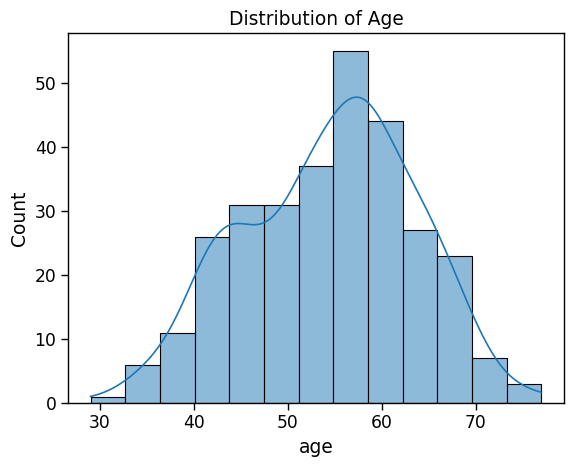

In [75]:
sns.histplot(data=df, x='age', kde=True,)
plt.title('Distribution of Age')
plt.show()

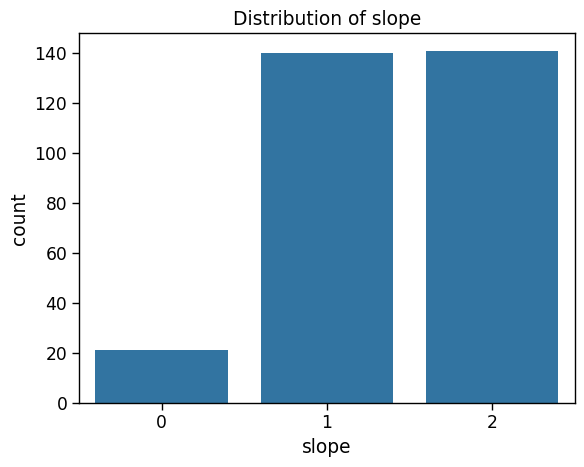

In [82]:
sns.countplot(data=df, x='slope')
plt.title('Distribution of slope')
plt.show()

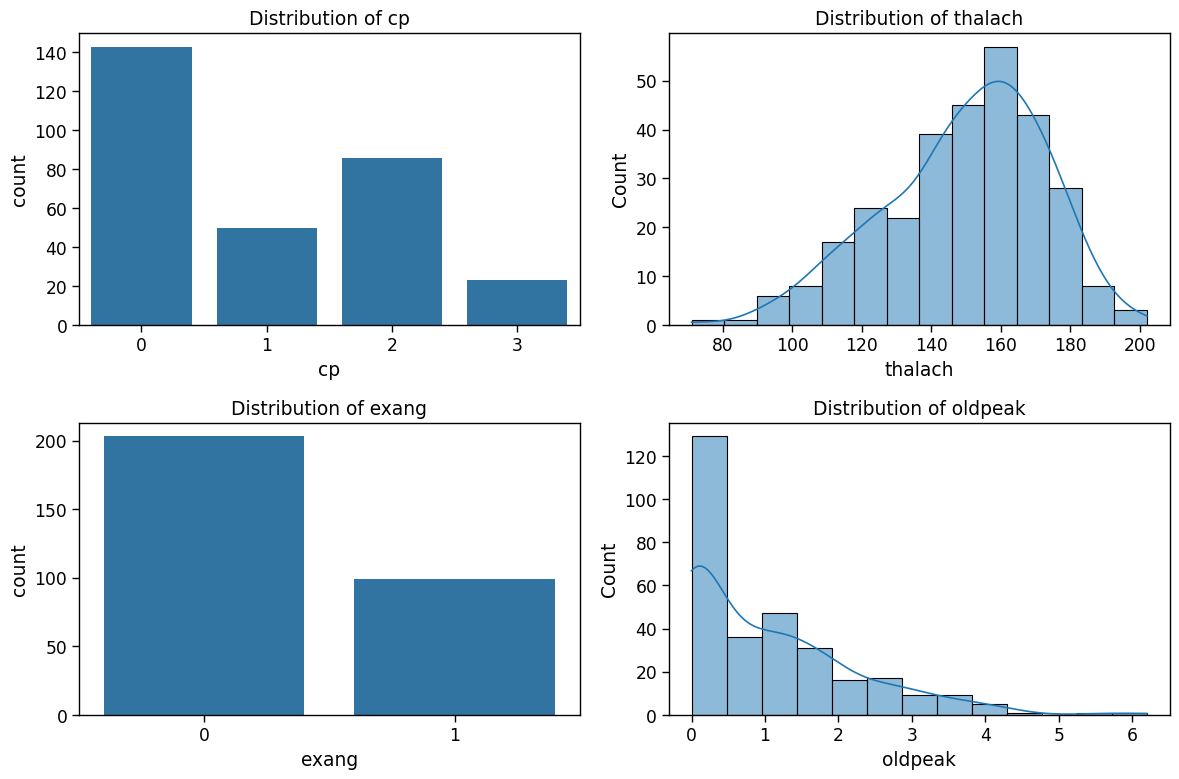

In [84]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(data=df,x='cp')
plt.title('Distribution of cp')

plt.subplot(2, 2, 2)
sns.histplot(df['thalach'], kde=True)
plt.title('Distribution of thalach')

plt.subplot(2, 2, 3)
sns.countplot(data=df,x='exang')
plt.title('Distribution of exang')

plt.subplot(2, 2, 4)
sns.histplot(df['oldpeak'], kde=True)
plt.title('Distribution of oldpeak')

plt.tight_layout()
plt.show()


Correlation heatmap

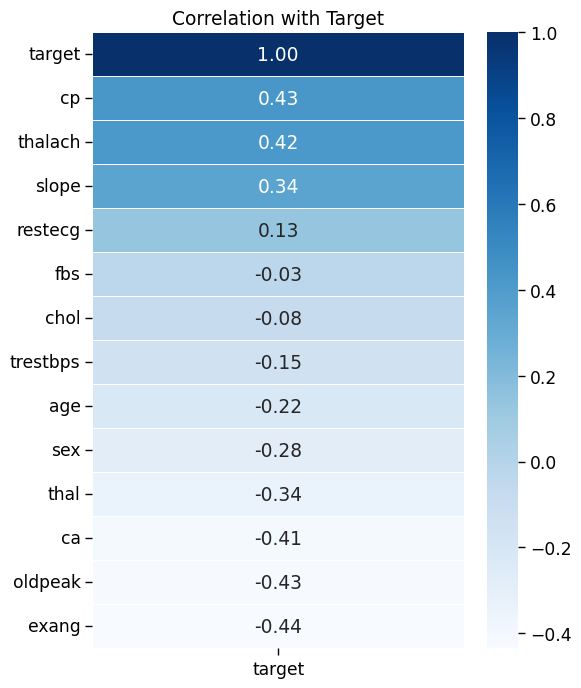

In [85]:
df_mx = df.corr()[['target']].sort_values(by='target', ascending=False)

plt.figure(figsize=(6,8))
sns.heatmap(df_mx, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation with Target")
plt.show()


Comparison of feature values between diseased and non-diseased patients

In [86]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


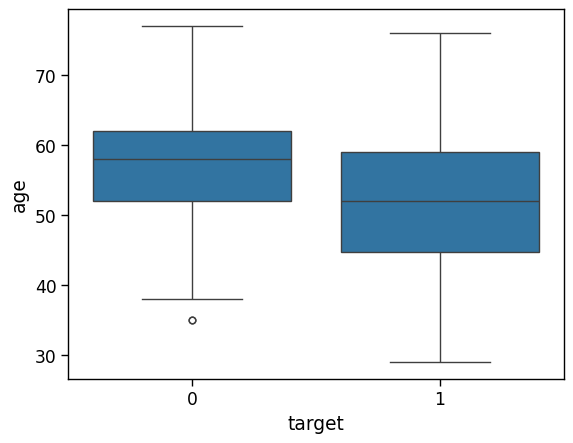

In [87]:
sns.boxplot(x='target', y='age', data=df)
plt.show()

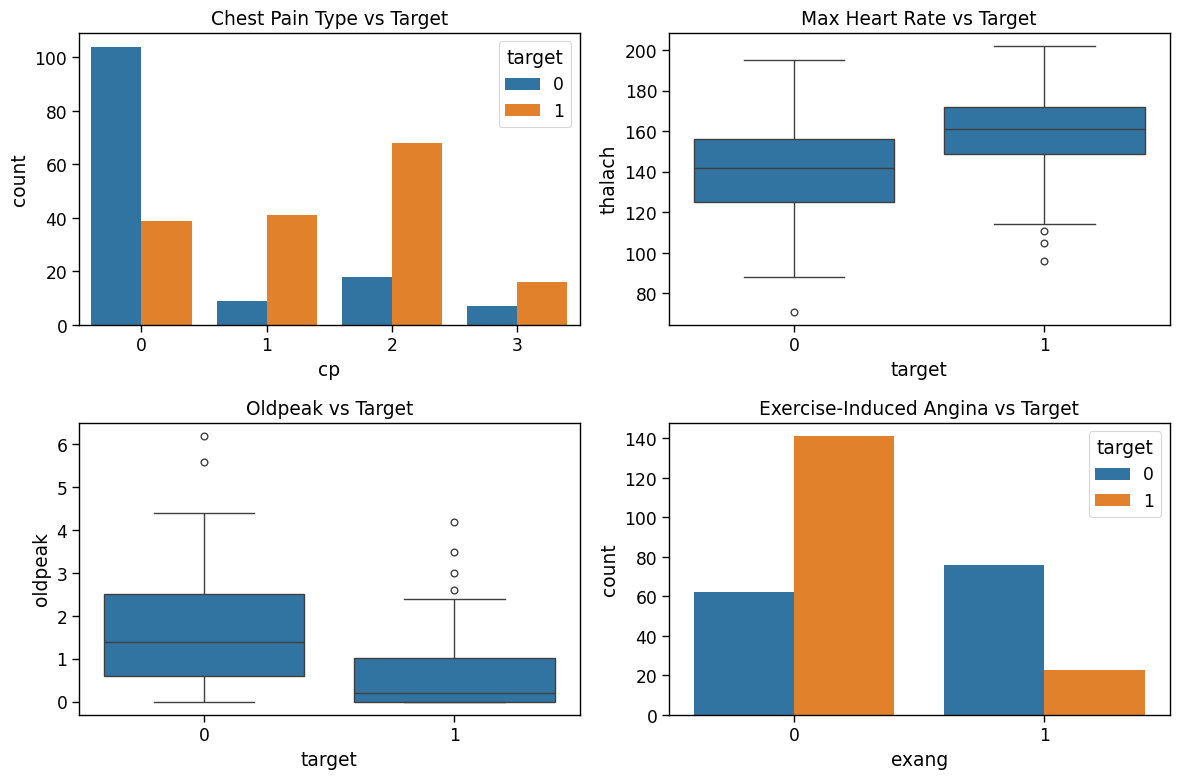

In [88]:
plt.figure(figsize=(12, 8))

# 1️⃣ Chest Pain Type (Categorical)
plt.subplot(2, 2, 1)
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Target')

# 2️⃣ Maximum Heart Rate (Numerical)
plt.subplot(2, 2, 2)
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Max Heart Rate vs Target')

# 3️⃣ ST Depression (Numerical)
plt.subplot(2, 2, 3)
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('Oldpeak vs Target')

# 4️⃣ Exercise Induced Angina (Binary Categorical)
plt.subplot(2, 2, 4)
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise-Induced Angina vs Target')

plt.tight_layout()
plt.show()
